<h2><u>Problem Statement: </u> </h2> <h3>"Employee Attrition": The task is to find through predictive modelling, why employees leave the company prematurely and the redundant factors that cause this Attrition. </h3>

<h2><u>Project by:</u></h2><h3> Ajay Sethuraman</h3> <br>
<h2><u>Under the guidance of:</u></h2> <h3> Mr. Muthuraja Sivanantham </h3> <br>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings


In [2]:
df=pd.read_csv("HR_comma_sep_2.csv")

In [3]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3,0,1,0,sales,low
1,0.80,0.86,5.0,262.0,6,0,1,0,sales,medium
2,0.11,0.88,7.0,272.0,4,0,1,0,sales,medium
3,0.72,0.87,5.0,223.0,5,0,1,0,sales,low
4,0.37,0.52,2.0,159.0,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14971.000000,14999.000000,14976.000000,14953.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612932,0.716102,3.802618,201.008426,3.498233,0.144610,0.238083,0.021268
std,0.248602,0.171169,1.232410,49.915516,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(14999, 10)

## Exploratory Analysis on the data
<br> Here we are doing some basic exploratory analysis on the data, bringing up information on the data and a look at the data in a visual manner. We are also looking at the missing values and fixing them.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14971 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14976 non-null  float64
 3   average_montly_hours   14953 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14973 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


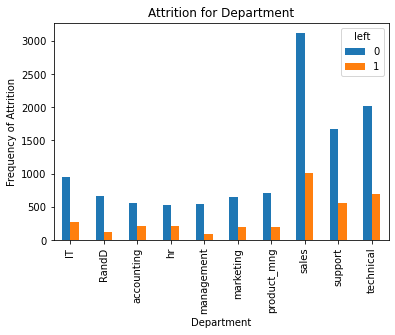

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Attrition for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.savefig('department_bar_chart')

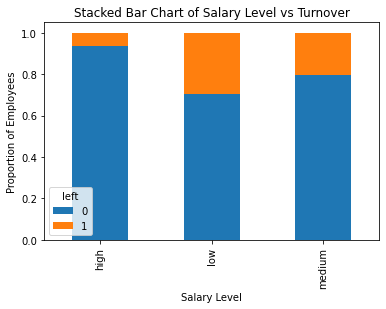

In [8]:
table=pd.crosstab(df.salary, df.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

Dataset contains 14999 rows and 10 columns, each row has the details of an employee.  
2 variables are categorical, remaining columns are of int and float

### Checking for any missing values

In [9]:
df.isnull().sum()

satisfaction_level       28
last_evaluation           0
number_project           23
average_montly_hours     46
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department               26
salary                    0
dtype: int64

As seen above the data contains some missing values, so we will fill them by mean for the numerical values and use ffill for the non-numerical value. <br>
Come up with a percentage for missing values

In [10]:
m1 = df['satisfaction_level'].mean()
m2 = df['number_project'].mean()
m3 = df['average_montly_hours'].mean()

In [11]:
df["satisfaction_level"].fillna(value = m1, inplace = True)
df["number_project"].fillna(value = m2, inplace = True)
df["average_montly_hours"].fillna(value = m3, inplace = True)
df["Department"].fillna(method = 'ffill', inplace = True)

In [12]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

All the missing values have been filled.

In [13]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3,0,1,0,sales,low
1,0.80,0.86,5.0,262.0,6,0,1,0,sales,medium
2,0.11,0.88,7.0,272.0,4,0,1,0,sales,medium
3,0.72,0.87,5.0,223.0,5,0,1,0,sales,low
4,0.37,0.52,2.0,159.0,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3,0,1,0,support,low
14995,0.37,0.48,2.0,160.0,3,0,1,0,support,low
14996,0.37,0.53,2.0,143.0,3,0,1,0,support,low
14997,0.11,0.96,6.0,280.0,4,0,1,0,support,low


In [14]:
## Let's separate numerical and categorical vaiables into 2 dfs

def sep_data(data):
    
    numerics = ['int32','float32','int64','float64']
    num_data = df.select_dtypes(include=numerics)
    cat_data = df.select_dtypes(exclude=numerics)
    
    return num_data, cat_data

num_data,cat_data = sep_data(df)

In [15]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1226
product_mng     903
marketing       859
RandD           787
accounting      766
hr              739
management      630
Name: Department, dtype: int64

In [16]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<h3> Running VIF to check highly correlated values, since they may be redundant. </h3>

In [17]:
features = num_data.drop(columns='left')
feature_list = "+".join(features.columns)
y, X = dmatrices('left~'+feature_list,num_data,return_type='dataframe')

In [18]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VIF Factor,Features
0,35.876067,Intercept
1,1.063041,satisfaction_level
2,1.239127,last_evaluation
3,1.348903,number_project
4,1.273273,average_montly_hours
5,1.060308,time_spend_company
6,1.005268,Work_accident
7,1.007576,promotion_last_5years


The above table shows that there is no variable with a 'high" Variance Inflation Factor.
So, this method suggests we should not drop any variable

In [19]:
num_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666796,0.715473,3.786616,199.059592,3.380032,0.175009,0.026251
1,0.440552,0.718113,3.853826,207.245133,3.876505,0.047326,0.005321


D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

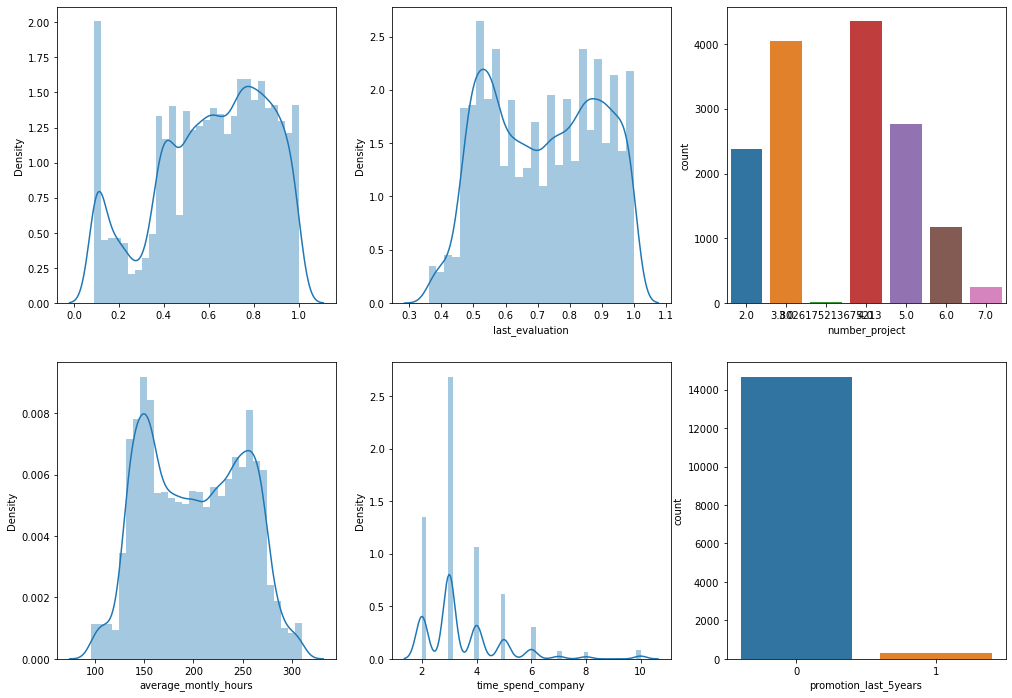

In [20]:
fig,ax = plt.subplots(2,3, figsize=(17,12))               
sns.distplot(x= df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.countplot(df['number_project'], ax = ax[0,2]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df['time_spend_company'], ax = ax[1,1]) 
sns.countplot(df['promotion_last_5years'], ax = ax[1,2])
plt.show()

<h3>Satisfaction </h3>
<br>
Employees with a low level of satisfaction (<0.3) = 1941
Employees with a high level of satisfaction (=>0.7) = 6502
<br>
<h3>Last Evaluation</h3>
<br>
Considering a grade equal to or greater than 7 as high, we have 8015 employees well evaluated by the company i.e. around 53%
<br>
<h3>Number of Project</h3>
<br>
Most employees worked on 3-4 projects and the employees with 7 Projects are very less in number. The employees worked on at least 2 and at most 7 projects.
<br>
<h3>Time Spend</h3><br> 
This is a positively skewed distribution, with a reduction in the number of employees per year as it approaches the right tail.
<br>
<h3>Promotions</h3><br> Very few people promoted. Only 2% of people have already been promoted. Knowing the career plan policy would be important to understand this shortage of promotions.

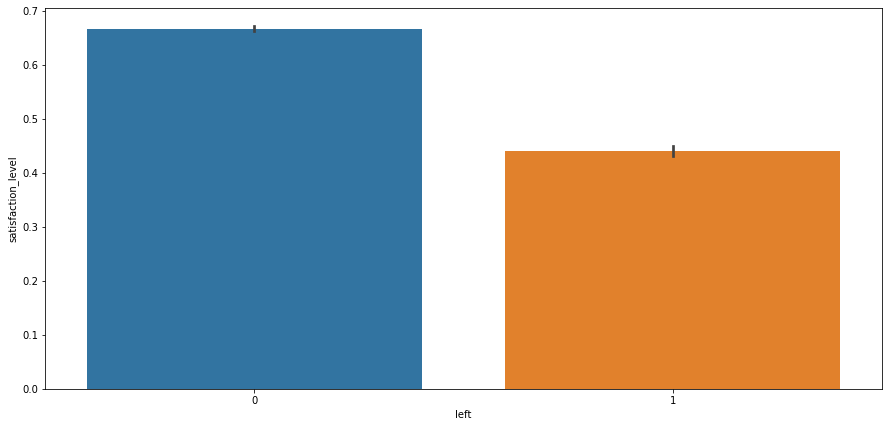

In [21]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='left', y ='satisfaction_level' ,data=df)
plt.show()

When we compare the values between the hired and those who leave, we can see that, for the hired the satisfaction ranges that prevail are those of satisfaction and regular satisfaction, the two corresponding to 87% of the hired. <br> <br>For those who leave the dissatisfied range alone corresponds to 49% of this set. <b> Hence, almost half of the employees who leave the company are dissatisfied.</b>

Among the hired we observe that the satisfied ones form the largest group, followed by those of regular satisfaction, dissatisfied individuals are the minority.<br>

Rename axes

### Did the employees who left receive a low salary?

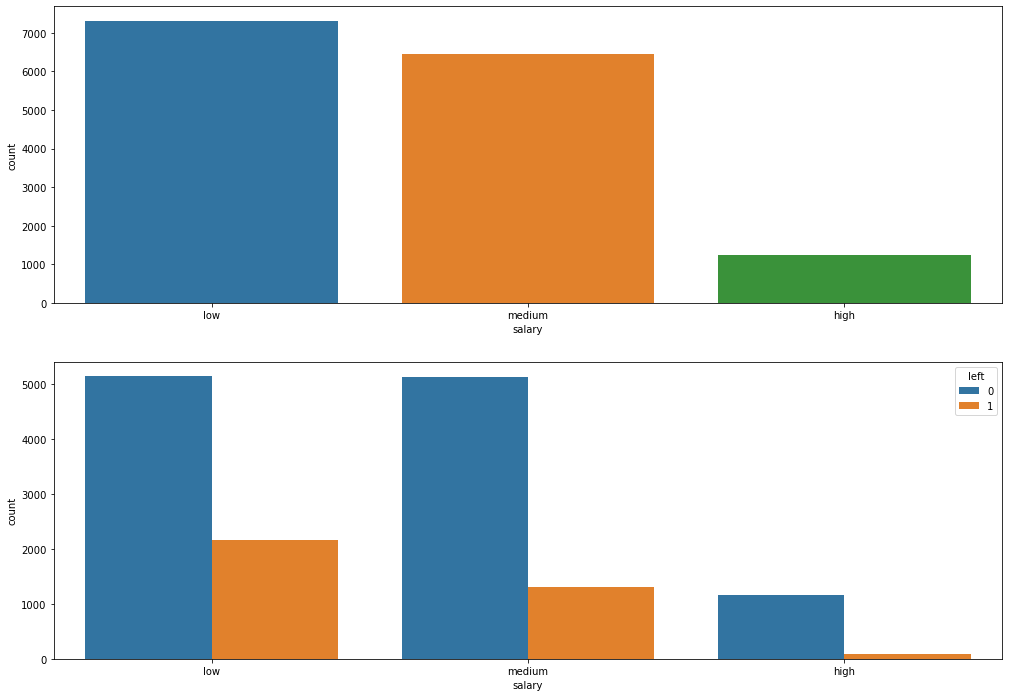

In [22]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(x='salary',data=df , ax=ax[0])
sns.countplot(x='salary', hue = 'left' , data=df , ax=ax[1])
plt.show()

### Employees in each Department

D:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


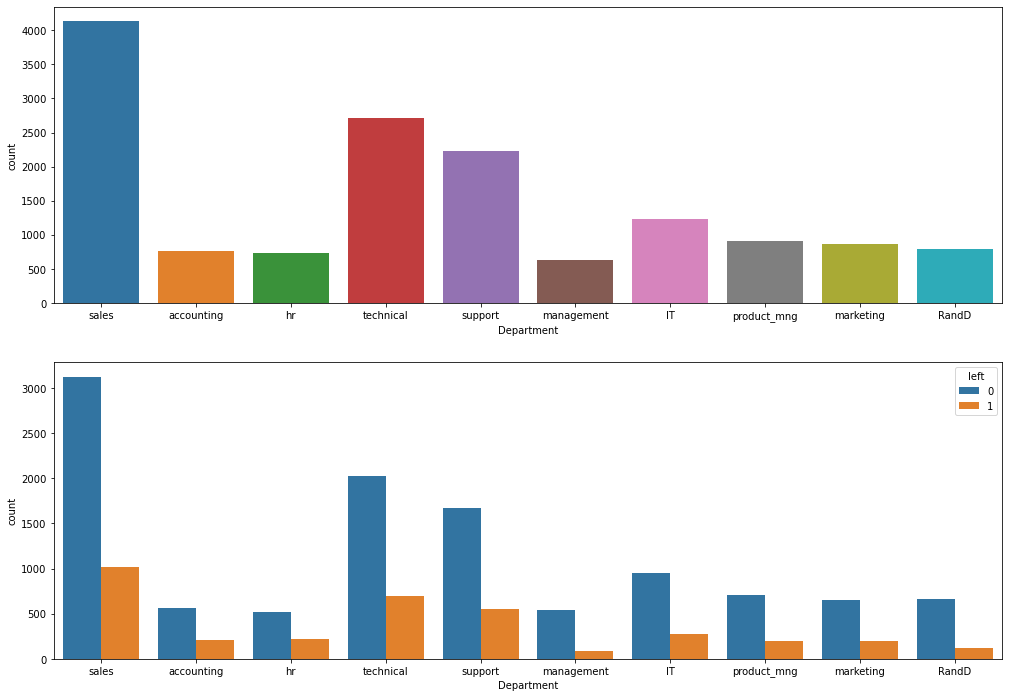

In [23]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(x='Department',data=df , ax=ax[0])
sns.countplot(df['Department'],hue=df['left'],data=df , ax=ax[1])
plt.show()


The Sales department is the one with the largest number of employees, followed by the Technical and Support department, totaling 9,089 employees. Management is the smallest of them with 630 employees.

### Department and left employees in relation with the salary range

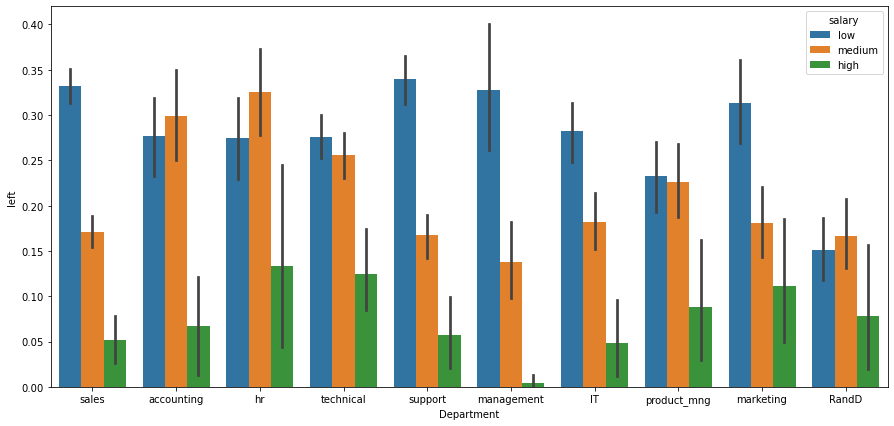

In [24]:
fig = plt.figure(figsize=(15,7))
sns.barplot(y='left',x='Department', hue= 'salary',data=df)
plt.show()

Add observation

### Employees of which department left the company in maximum numbers?

D:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


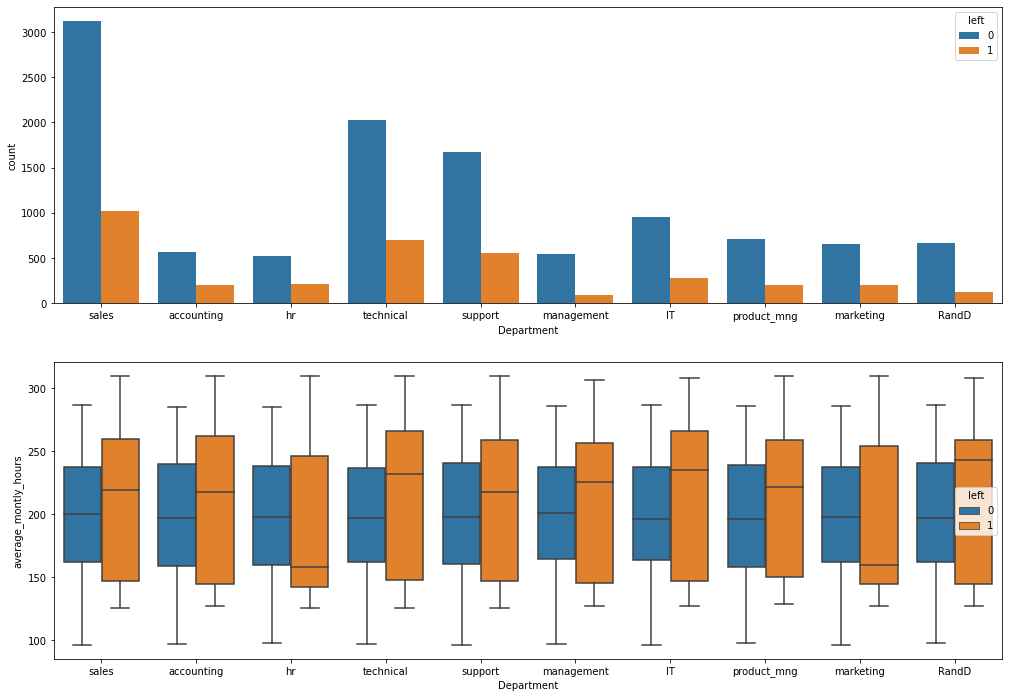

In [25]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.countplot(df['Department'],hue=df['left'],data=df , ax=ax[0])
sns.boxplot(y='average_montly_hours', x='Department', hue= 'left',data=df , ax=ax[1])
plt.show()

The employees who left work for longer hours and lesser salaries.

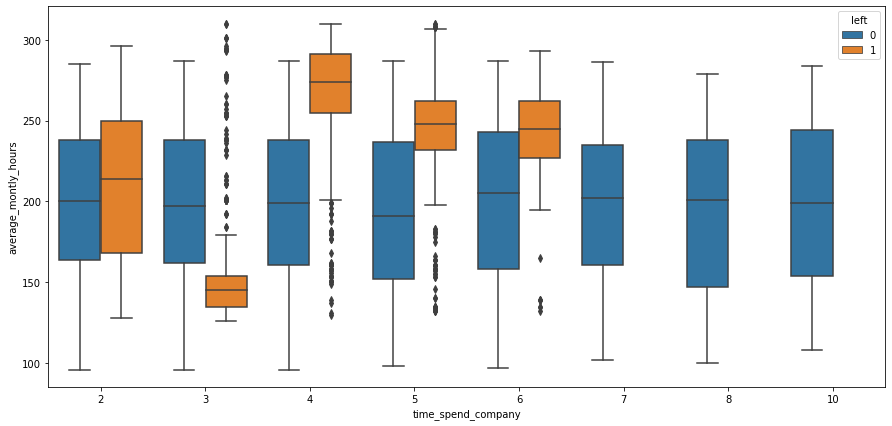

In [26]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='average_montly_hours',x='time_spend_company', hue= 'left',data=df)
plt.show()

Here we can see the people who have worked in the company between 2 and 10 years. <br><br> For those who worked for a total of 2 years, the difference is small between the hired and who leaves. The employee who leaves worked for more hours. <br><br>The data for those who worked for 3 years is quite different from the others, they exhibit a new grouping of people who leaves and worked less hours than the average monthly.<br><br> During the univariate graphs section, seeing the distribution of the total number of people per years worked, observe a peak in the 3rd year and from there a fall in the total of people per year after the 4th year.<br> look at outliers

### Is the employee's dissatisfaction a factor for leaving the company? 

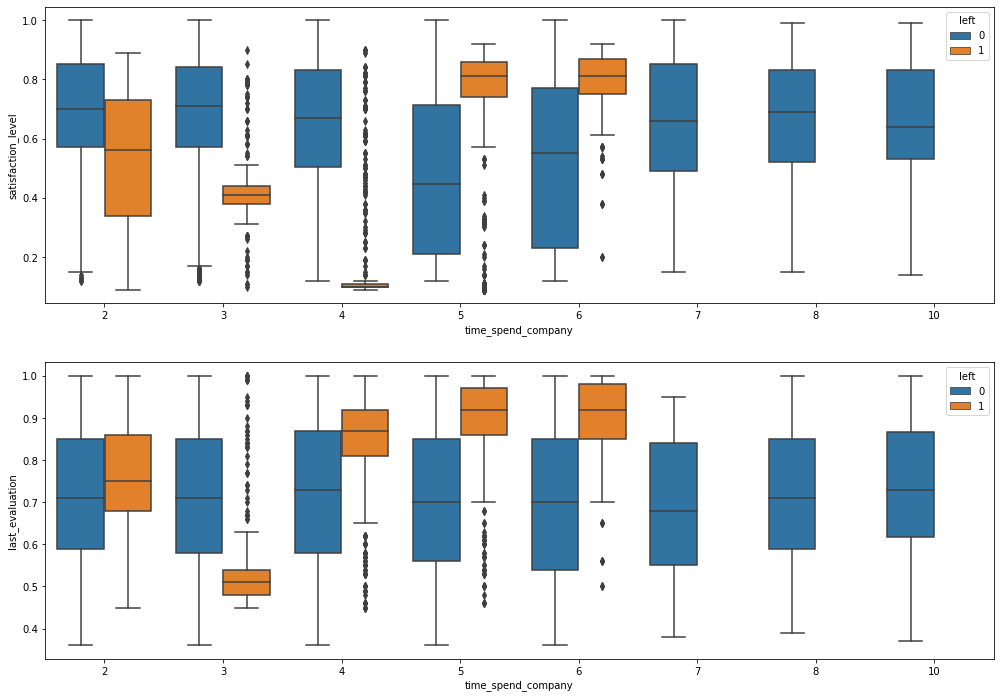

In [27]:
fig,ax = plt.subplots(2,1, figsize=(17,12))
sns.boxplot(y='satisfaction_level',x='time_spend_company', hue= 'left',data=df , ax=ax[0])
sns.boxplot(y='last_evaluation',x='time_spend_company', hue= 'left',data=df , ax=ax[1])
plt.show()

We see dissatisfaction with employees who leave the company in the 3rd or 4th year. People who left the company in the 5th grade, mostly showed low or high satisfaction. Most of then who worked at the company for 6 years demonstrated a high satisfaction level of over 0.75. 
<br><br>
Again the 3rd year is a major factor. The people who left the company in the 3rd year received a low score in the last evaluation, a fact that does not repeat from the 4th to the 6th year, where the majority of those employees received grades higher than 0.8.

### Does the salary received depend upon the number of projects done?

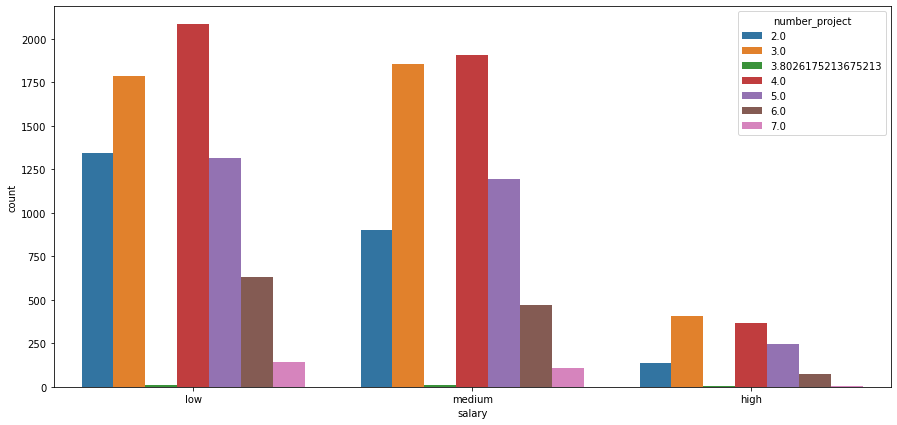

In [28]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary', hue = 'number_project',data=df)
plt.show()

Both people with high, medium or low salary worked on 2 projects or more. Around 140 people worked on 7 projects and received a low salary. So answering the question, there is no evidence of connection between number of projects and salary range.

### Did Employees who were involved in more projects received more?

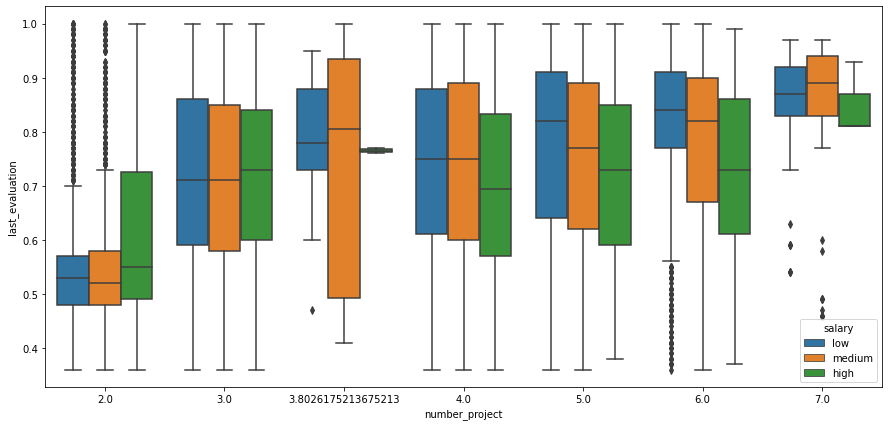

In [29]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='last_evaluation',x='number_project', hue= 'salary',data=df)
plt.show()

People who left and also worked on 7 projects, and received low scores would have been dissatisfied. Those who left the company involved in 2 projects, regardless of the salary range, predominantly received low scores in their evaluations. People with more than 4 projects tended to receive better grades in their assessments.<br><br>outliers

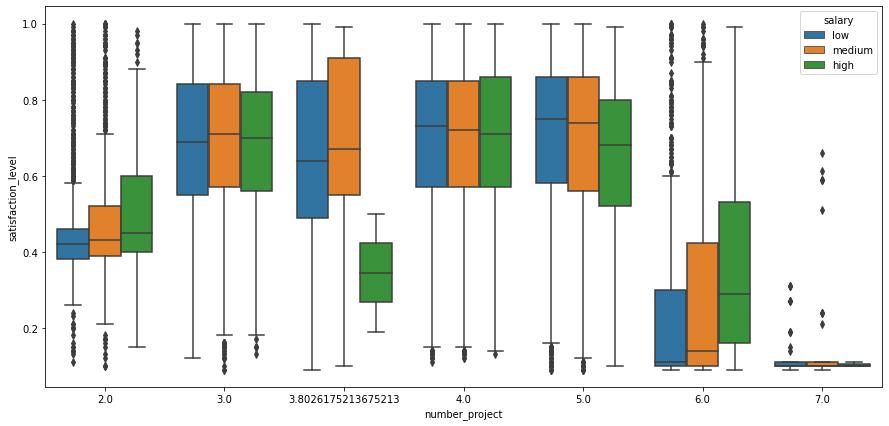

In [30]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(y='satisfaction_level',x='number_project', hue= 'salary',data=df)
plt.show()

In this plot we have the proportion of the satisfaction of who left by numbers of projects. <br><br>People with 2 projects showed a low to regular satisfaction. The group with 6 or 7 projects also showed a low to regular satisfaction level. <br><br> Employees who worked on 4 or 5 projects had a predominantly high satisfaction.


### Is Work Load a reason for employees to leave?

<Figure size 648x648 with 0 Axes>

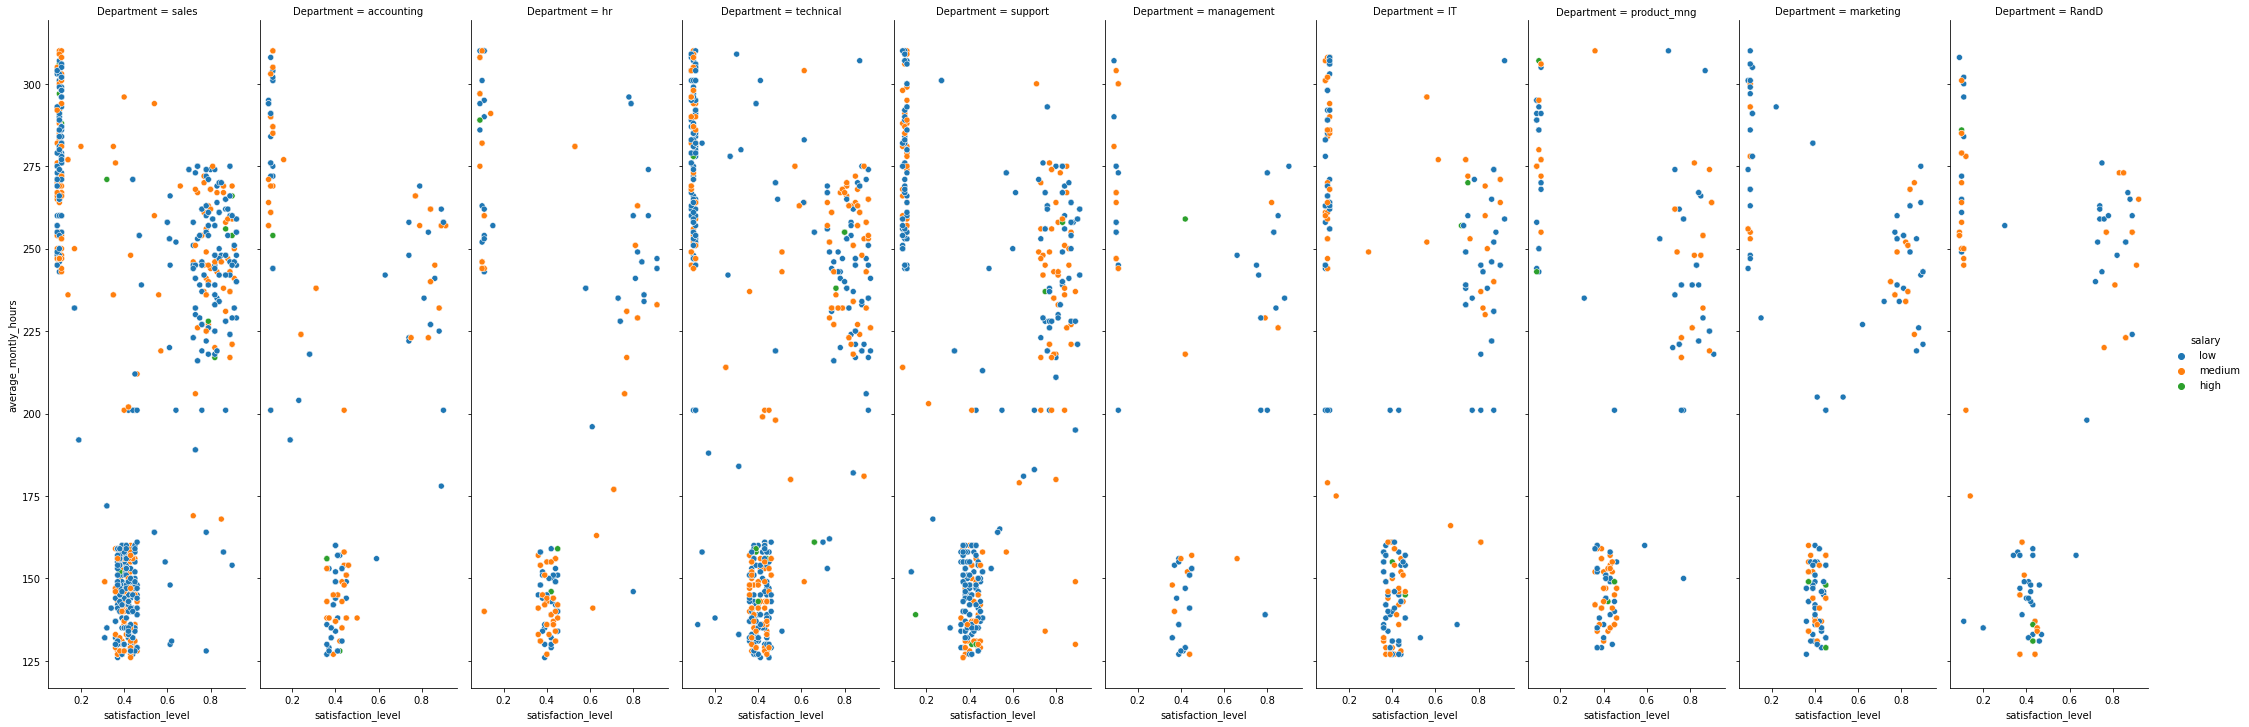

In [31]:
# Find the effect of satisfaction level and the average monthly hours with department and salary level
# on departure of  employees.
plt.figure(figsize=(9,9))
sns.relplot(x="satisfaction_level",
                y="average_montly_hours",
                col="Department",
                hue="salary",
                kind="scatter",
                height=10,
                aspect=0.3,
                data=df[df['left']==1])

<Figure size 648x648 with 0 Axes>

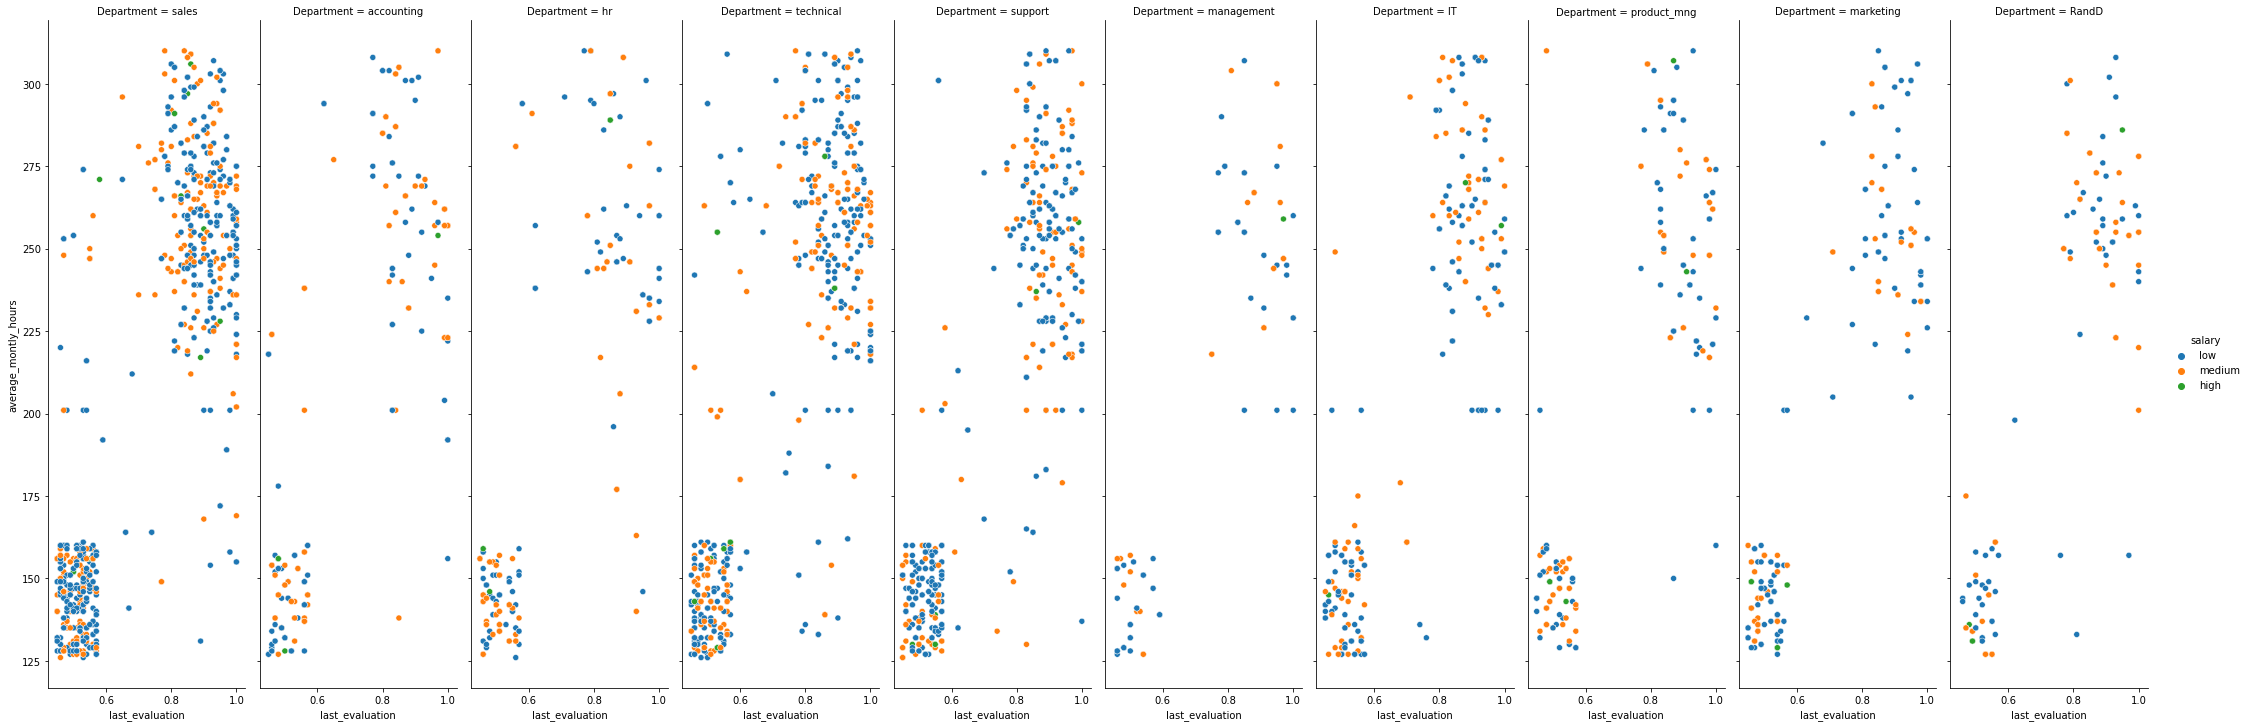

In [32]:
plt.figure(figsize=(9,9))
sns.relplot(x="last_evaluation",
                y="average_montly_hours",
                col="Department",
                hue="salary",
                kind="scatter",
                height=10,
                aspect=0.3,
                data=df[df['left']==1])

### Work Accident

In [33]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

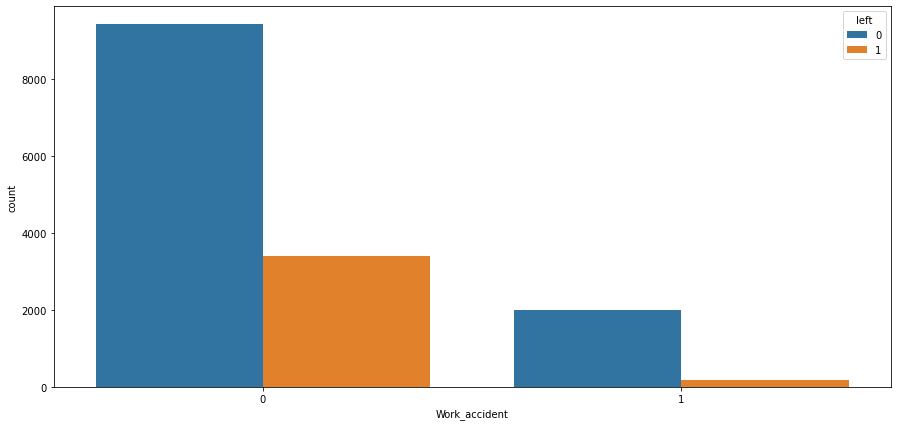

In [34]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Work_accident', hue = 'left',data=df)
plt.show()

Both people with high, medium or low salary worked on 2 projects or more. 144 people worked on 7 projects and received a low salary. So there is no proof that the larger the number of projects, the better the salary range.

Even though they have suffered an accident at work, the employees remain in the company. <b> This variable does not seem to be related to the employee's exit.</b>

Now that we know the importance of the variables satisfaction_level and average_montly_hours we will calculate the value of the pearson correlation for the data set variables hr:

### Correlation Matrix

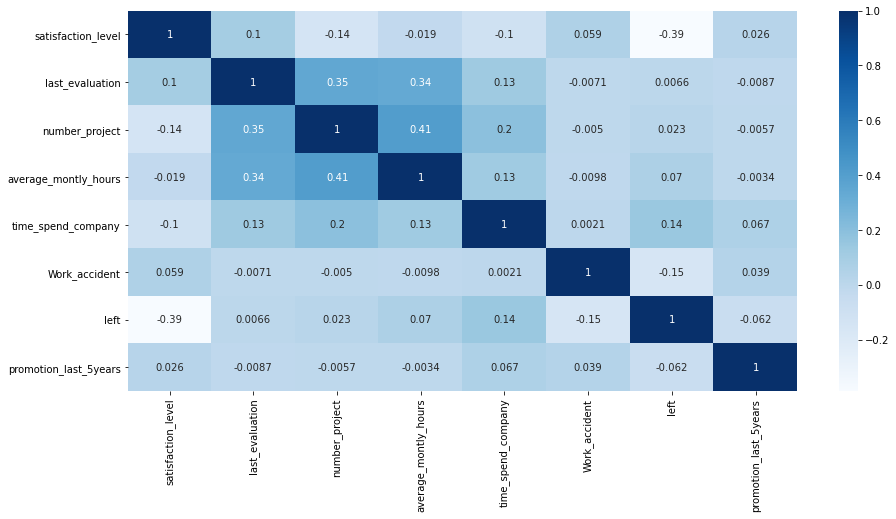

In [35]:
fig = plt.figure(figsize=(15,7))
cor_mat=num_data.corr()
sns.heatmap(cor_mat ,annot = True, cmap='Blues')
plt.show()

# cmap green yellow red

The darker, the more correlated are the variables, the whites have negative correlation values and the positive blue ones.

For the left variable the correlations were found: <b>

- Satisfaction_level = With a value of -0.39 that is variable with the strongest correlation with left
- Work_accident = Poor correlation, value -0.15
- Time_spend_company = Poor correlation, value 0.14
- Average_montly_hours = Very poor correlation, value 0.071
- last_evaluation = Very weak correlation, value 0.0066
- number_project = Very poor correlation, value 0.024
- Promotion_last_5years = Very weak correlation, value -0.062

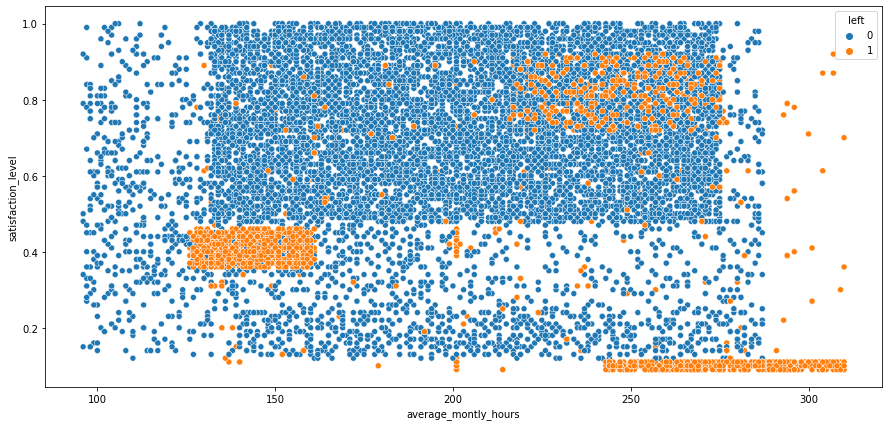

In [36]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x="average_montly_hours", y= "satisfaction_level",hue='left' ,data=df)
plt.show()

<h3>Summary of the Observations</h3> <br>
The people who left the company were <b>overburdened and unsatisfied.</b>

- The unsatisfied who worked less than the general average and those who worked more than the average and more than the remain;

- Those with a good level of satisfaction, but who also had a monthly average of hours worked over 201 hours of the general average.

## Data Preprocessing
Convert the salary column to categorical

In [37]:
df.salary=df.salary.astype('category')
df.salary=df.salary.cat.reorder_categories(['low', 'medium', 'high'])
df.salary = df.salary.cat.codes

In [38]:
departments = pd.get_dummies(df.Department)
departments.head(5)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [39]:
departments = departments.drop("accounting", axis=1)
df = df.drop("Department", axis=1)
df = df.join(departments)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2.0,157.0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5.0,262.0,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7.0,272.0,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5.0,223.0,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2.0,159.0,3,0,1,0,0,0,0,0,0,0,0,1,0,0


As the values in the column satisfaction_level and last_evaluation are not in the order of the other entries we can multiply the values in the column by a constant to make it in the order of the column values.

In [40]:
# Multiplying by 10, it won't change the value but it is useful to visualize
df.satisfaction_level=df.satisfaction_level*10
df.last_evaluation=df.last_evaluation*10

### Percentage of Employee Attrition

In [41]:
n_employees = len(df)
print(df.left.value_counts())
print(df.left.value_counts()/n_employees*100)

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64


11,428 employees stayed, which accounts for about 76% of the total employee count. Similarly, 3,571 employees left, which accounts for about 24% of them

In [42]:
def count_target_plot(data,target):
    plt.figure(figsize=(8,8))
    ax=sns.countplot(data=data,x=data[target],order=data[target].value_counts().index)
    plt.xlabel('Target Variable- Left')
    plt.ylabel('Distribution of target variable')
    plt.title('Distribution of Left')
    total = len(data)
    for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

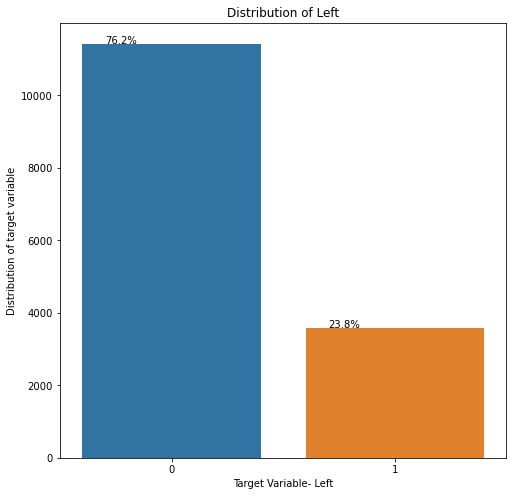

In [43]:
count_target_plot(df,'left')

###  Separating Target and Features
Let us separate the Dependent Variable (target) and the Independent Variables (predictors).

In [44]:
target=df.left
features=df.drop('left',axis=1)

### Splitting the Dataset
We will split both target and features into train and test sets with 80% and 20% ratio, respectively.

In [45]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(features, target):
        features_train, features_test = features.iloc[train_index], features.iloc[test_index]
        target_train, target_test = target.iloc[train_index], target.iloc[test_index]

## Model Building

### Logistic Regression

In [46]:
logr = LogisticRegression(random_state=42)
logr.fit(features_train, target_train)
y_pred_logr = logr.predict(features_test)
print("Score on Train data : " , logr.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_logr)*100)

Score on Train data :  78.58154846237187
Score on Test data :  78.93333333333334


D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision tree 

In [47]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(features_train, target_train)
y_pred_DT = DT.predict(features_test)
print("Score on Train data : " , DT.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_DT)*100)

Score on Train data :  100.0
Score on Test data :  97.7


The accuracy is 100% on training data and the model is overfitting. So we will purne the tree, by setting the maximum depth and limiting the sample size.

In [48]:
DT1 = DecisionTreeClassifier(max_depth=9,min_samples_leaf=2, random_state=42)
DT1.fit(features_train, target_train)
y_pred_DT1 = DT1.predict(features_test)
print("Score on Train data : " , DT1.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_DT1)*100)

Score on Train data :  98.3331944328694
Score on Test data :  98.06666666666666


### Random Forest

In [49]:
RF = RandomForestClassifier(random_state=42)
RF.fit(features_train, target_train)
y_pred_RF = RF.predict(features_test)
print("Score on Train data : " , RF.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_RF)*100)

Score on Train data :  100.0
Score on Test data :  99.2


Again the model is overfitting, hence we will set the maximum depth, limiting the sample size, and maximum features.


In [50]:
RF1 = RandomForestClassifier(min_samples_leaf=1, max_features= 5, max_depth=9,random_state=42)
RF1.fit(features_train, target_train)
y_pred_RF1 = RF.predict(features_test)
print("Score on Train data : " , RF1.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_RF1)*100)

# Lasso, regualrization, Hyp Tuning for overfitting

Score on Train data :  98.18318193182766
Score on Test data :  99.2


### KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(features_train, target_train)
y_pred_knn = knn.predict(features_test)
print("Score on Train data : " , knn.score(features_train,target_train)*100)
print("Score on Test data : " , accuracy_score(target_test, y_pred_knn)*100)

Score on Train data :  97.67480623385282
Score on Test data :  96.0


In [52]:
print("Logistic Regression : ")
print(classification_report(target_test,y_pred_logr))
print("=======================================================")
print("Decison Tree : ")
print(classification_report(target_test,y_pred_DT))
print(classification_report(target_test,y_pred_DT1))
print("=======================================================")
print("Random Forest : ")
print(classification_report(target_test,y_pred_RF))
print(classification_report(target_test,y_pred_RF1))
print("=======================================================")
print("KNN : ")
print(classification_report(target_test,y_pred_knn))

Logistic Regression : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.60      0.35      0.44       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

Decison Tree : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.94      0.97      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.98      0.93      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98  

In [53]:
pred_prob1 = logr.predict_proba(features_test)
pred_prob2 = DT.predict_proba(features_test)
pred_prob3 = RF.predict_proba(features_test)
pred_prob4 = knn.predict_proba(features_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(target_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(target_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(target_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(target_test, pred_prob4[:,1], pos_label=1)

random_probs = [0 for i in range(len(target_test))]
p_fpr, p_tpr, _ = roc_curve(target_test, random_probs, pos_label=1)

In [54]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(target_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(target_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(target_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(target_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8248766698280362 0.9743138725306396 0.9919011349071563 0.9769688715381165


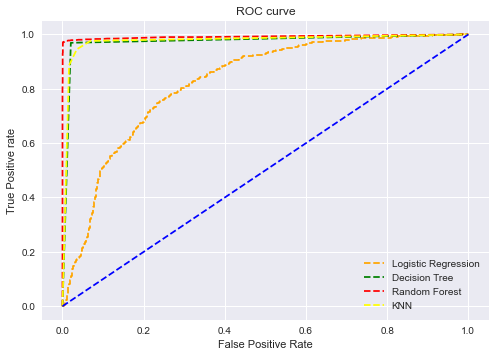

In [55]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show();

<b>AUC Score for Logistic Regression:</b> 0.8248766698280362 <br>
<b>AUC Score for Random Forests:</b> 0.9743138725306396 <br>
<b>AUC Score for Decision Trees:</b> 0.9919011349071563<br>
<b>AUC Score for KNN:</b> 0.9769688715381165<br>

<h1>=============================================================</h1>


<h2>                     End of Project </h2><br>
<h1>=============================================================</h1>

In [230]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(target_train,(sm.add_constant(features_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11999
Model:                            GLM   Df Residuals:                    11981
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5178.5
Date:                Wed, 21 Jul 2021   Deviance:                       10357.
Time:                        15:07:15   Pearson chi2:                 1.12e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3941      0.167      2.359      0.018       0.067       0.722
satisfaction_level       -0.4078      0.011    -37.474      0.000      -0.429      -0.387
last_evaluation           0.0828      0.017      5.007      0.000       0.050       0.115
number_project           -0.3094      0.024    -13.081      0.000      -0.356      -0.263
average_montly_hours      0.0043      0.001      7.478      0.000       0.003       0.005
time_spend_company        0.2702      0.017     15.682      0.000       0.236       0.304
Work_accident            -1.4825      0.098    -15.081      0.000      -1.675      -1.290
promotion_last_5years    -1.5275      0.307     -4.971      0.000      -2.130      -0.925
salary                   -0.6859      0.043    -16.108      0.000      -0.769      -0.602
IT                       -0.0920      0.136     -0.675      0.500      -0.359       0.175
RandD                    -0.5014      0.162     -3.103      0.002      -0.818      -0.185
hr                        0.2524      0.147      1.722      0.085      -0.035       0.540
management               -0.5790      0.180     -3.223      0.001      -0.931      -0.227
marketing                -0.0034      0.148     -0.023      0.982      -0.293       0.287
product_mng              -0.2070      0.146     -1.414      0.157      -0.494       0.080
sales                     0.0074      0.114      0.065      0.948      -0.217       0.232
support                   0.0853      0.122      0.697      0.486      -0.154       0.325
technical                 0.0770      0.119      0.644      0.519      -0.157       0.311
=========================================================================================
"""

In [231]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(features_train, target_train)

list(zip(features_train.columns, rfe.support_, rfe.ranking_))

D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

[('satisfaction_level', True, 1),
 ('last_evaluation', True, 1),
 ('number_project', True, 1),
 ('average_montly_hours', False, 3),
 ('time_spend_company', True, 1),
 ('Work_accident', True, 1),
 ('promotion_last_5years', True, 1),
 ('salary', True, 1),
 ('IT', True, 1),
 ('RandD', True, 1),
 ('hr', True, 1),
 ('management', True, 1),
 ('marketing', False, 2),
 ('product_mng', True, 1),
 ('sales', True, 1),
 ('support', True, 1),
 ('technical', True, 1)]

In [232]:
col = features_train.columns[rfe.support_]

features_train_sm = sm.add_constant(features_train[col])
logm2 = sm.GLM(target_train,features_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11999
Model:                            GLM   Df Residuals:                    11983
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5206.7
Date:                Wed, 21 Jul 2021   Deviance:                       10413.
Time:                        15:07:16   Pearson chi2:                 1.13e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7570      0.141      5.357      0.000       0.480       1.034
satisfaction_level       -0.4046      0.011    -37.460      0.000      -0.426      -0.383
last_evaluation           0.1120      0.016      6.986      0.000       0.081       0.143
number_project           -0.2403      0.021    -11.208      0.000      -0.282      -0.198
time_spend_company        0.2734      0.017     15.917      0.000       0.240       0.307
Work_accident            -1.4875      0.098    -15.163      0.000      -1.680      -1.295
promotion_last_5years    -1.5498      0.307     -5.050      0.000      -2.151      -0.948
salary                   -0.6829      0.042    -16.081      0.000      -0.766      -0.600
IT                       -0.0970      0.114     -0.852      0.394      -0.320       0.126
RandD                    -0.5059      0.143     -3.540      0.000      -0.786      -0.226
hr                        0.2570      0.126      2.043      0.041       0.010       0.504
management               -0.5988      0.163     -3.665      0.000      -0.919      -0.279
product_mng              -0.2067      0.126     -1.646      0.100      -0.453       0.039
sales                     0.0064      0.087      0.074      0.941      -0.163       0.176
support                   0.0767      0.097      0.793      0.428      -0.113       0.266
technical                 0.0760      0.093      0.817      0.414      -0.106       0.258
=========================================================================================
"""

In [233]:
# Getting the predicted values on the train set
target_train_pred = res.predict(features_train_sm)
target_train_pred[:10]

3259     0.132181
13174    0.256829
12374    0.075488
3043     0.030982
6938     0.027658
9404     0.068115
1889     0.751046
10262    0.281384
884      0.380660
6457     0.141154
dtype: float64

In [234]:
target_train_pred_final = pd.DataFrame({'Churn':target_train.values, 'Churn_Prob':target_train_pred})
target_train_pred_final['CustID'] = target_train.index
target_train_pred_final.head()

,Churn,Churn_Prob,CustID
3259,0,0.132181,3259
13174,0,0.256829,13174
12374,1,0.075488,12374
3043,0,0.030982,3043
6938,0,0.027658,6938


In [235]:
target_train_pred_final['predicted'] = target_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the dataframe
target_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
3259,0,0.132181,3259,0
13174,0,0.256829,13174,0
12374,1,0.075488,12374,0
3043,0,0.030982,3043,0
6938,0,0.027658,6938,0


In [236]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(target_train_pred_final.Churn, target_train_pred_final.predicted )
print(confusion)

[[8479  663]
 [1774 1083]]


In [237]:
print(metrics.accuracy_score(target_train_pred_final.Churn, target_train_pred_final.predicted))

0.7968997416451371


In [238]:
# vif = pd.DataFrame()
# vif['Features'] = features_train[col].columns
# vif['VIF'] = [variance_inflation_factor(features_train[col].values, i) for i in range(features_train[col].shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [239]:
# col = col.drop('last_evaluation', 1)

# Let's re-run the model using the selected variables
# features_train_sm = sm.add_constant(features_train[col])
# logm3 = sm.GLM(target_train,features_train_sm, family = sm.families.Binomial())
# res = logm3.fit()
# res.summary()